In [31]:
import torch

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [33]:
bairros = pd.read_csv("https://raw.githubusercontent.com/chandez/Estados-Cidades-IBGE/master/csv/bairros.csv")
bairros

,Id,Codigo,Nome,Uf
0,1,1100015001,Centro - Alta Floresta D'Oeste,RO
1,2,1100015002,Liberdade - Alta Floresta D'Oeste,RO
2,3,1100015003,Cidade Alta - Alta Floresta D'Oeste,RO
3,4,1100015004,Santa Felicidade - Alta Floresta D'Oeste,RO
4,5,1100015005,Princesa Isabel - Alta Floresta D'Oeste,RO
...,...,...,...,...
14315,14316,5218300009,Setor Mãe Bela - Posse,GO
14316,14317,5218300010,Setor Buenos Aires - Posse,GO
14317,14318,5218300011,Cafelândios - Posse,GO
14318,14319,5218300012,Vale do Amanhecer - Posse,GO


In [34]:
bairros["tokens"] = bairros["Nome"].str.split()
bairros

,Id,Codigo,Nome,Uf,tokens
0,1,1100015001,Centro - Alta Floresta D'Oeste,RO,"[Centro, -, Alta, Floresta, D'Oeste]"
1,2,1100015002,Liberdade - Alta Floresta D'Oeste,RO,"[Liberdade, -, Alta, Floresta, D'Oeste]"
2,3,1100015003,Cidade Alta - Alta Floresta D'Oeste,RO,"[Cidade, Alta, -, Alta, Floresta, D'Oeste]"
3,4,1100015004,Santa Felicidade - Alta Floresta D'Oeste,RO,"[Santa, Felicidade, -, Alta, Floresta, D'Oeste]"
4,5,1100015005,Princesa Isabel - Alta Floresta D'Oeste,RO,"[Princesa, Isabel, -, Alta, Floresta, D'Oeste]"
...,...,...,...,...,...
14315,14316,5218300009,Setor Mãe Bela - Posse,GO,"[Setor, Mãe, Bela, -, Posse]"
14316,14317,5218300010,Setor Buenos Aires - Posse,GO,"[Setor, Buenos, Aires, -, Posse]"
14317,14318,5218300011,Cafelândios - Posse,GO,"[Cafelândios, -, Posse]"
14318,14319,5218300012,Vale do Amanhecer - Posse,GO,"[Vale, do, Amanhecer, -, Posse]"


In [35]:
tokens = bairros["tokens"].values
vocab = sorted(list(set(sum(bairros["tokens"].values, []))))
vocab[15:20]

['(S-10', '(S-8', '(S-9', '-', '/']

<Axes: ylabel='Count'>

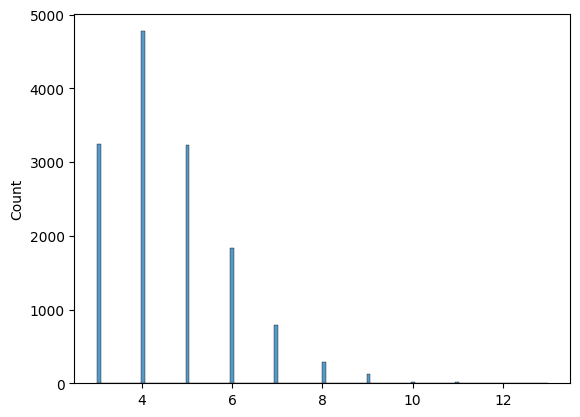

In [51]:
sns.histplot([len(t) for t in tokens])

In [36]:
# build the vocabulary of characters and mappings to/from integers
stoi = {s:i+1 for i,s in enumerate(vocab)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: '"S"', 2: '(L-10', 3: '(L-11', 4: '(L-12', 5: '(L-13', 6: '(L-9', 7: '(N-15', 8: '(N-16', 9: '(N-17', 10: '(N-18', 11: '(N-19', 12: '(O-13', 13: '(O-14', 14: '(O-15', 15: '(O-16', 16: '(S-10', 17: '(S-8', 18: '(S-9', 19: '-', 20: '/', 21: '01', 22: '01A', 23: '02', 24: '02A', 25: '03', 26: '03A', 27: '04', 28: '05', 29: '05A', 30: '06', 31: '06A', 32: '07', 33: '08', 34: '09', 35: '1', 36: '1-1', 37: '1-B-1', 38: '1/2', 39: '10', 40: '11', 41: '12', 42: '13', 43: '14', 44: '15', 45: '16', 46: '17', 47: '17A', 48: '18', 49: '19', 50: '1A', 51: '1ª', 52: '1º', 53: '2', 54: '2-2', 55: '2-3', 56: '2-4', 57: '2-5', 58: '2-6', 59: '2-7', 60: '2-8', 61: '2-9', 62: '2/2', 63: '20', 64: '200', 65: '2000', 66: '21', 67: '22', 68: '23', 69: '24', 70: '249', 71: '25', 72: '25A', 73: '26', 74: '27', 75: '28', 76: '29', 77: '2A', 78: '2ª', 79: '3', 80: '3-10', 81: '3-11', 82: '3-12', 83: '3-13', 84: '3-14', 85: '30', 86: '31', 87: '32', 88: '33', 89: '34', 90: '35', 91: '35º', 92: '3ª', 93: '4',

In [52]:
# build the dataset
block_size = 5 # context length: how many characters do we take to predict the next one?

def build_dataset(tokens):
  X, Y = [], []
  for w in tokens:

    context = [0] * block_size
    for ch in w + ['.']:
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [53]:
import random
random.seed(42)
random.shuffle(tokens)
n1 = int(0.8*len(tokens))
n2 = int(0.9*len(tokens))

Xtr, Ytr    = build_dataset(tokens[:n1])
Xdev, Ydev  = build_dataset(tokens[n1:n2])
Xte, Yte    = build_dataset(tokens[n2:])

torch.Size([63649, 5]) torch.Size([63649])
torch.Size([7929, 5]) torch.Size([7929])
torch.Size([8054, 5]) torch.Size([8054])
